# Extreme Gradient Boosting with XGBoost - Part 2 (DataCamp interactive course)

> Chapter 2 - Regression with XGBoost
    


- toc: true
- branch: master
- badges: true
- comments: true
- author: Hai Nguyen
- categories: [Python, Datacamp, Data Visualization, EDA, Pandas, XGBoost, scikit-learn]
- image: images/xgb_part2.png
- hide: false
- search_exclude: true
- metadata_key1: metadata_value1
- metadata_key2: metadata_value2



[**Download Datasets and Presentation slides for this post HERE**](https://github.com/anhhaibkhn/Data-Science-selfstudy-notes-Blog/tree/master/_notebooks/Extreme%20Gradient%20Boosting%20with%20XGBoost)

## Chapter 2: Regression with XGBoost

PREREQUISITES: Supervised Learning with scikit-learn, Case Study: School Budgeting with Machine Learning in Python.

> After a brief review of supervised regression, you'll apply XGBoost to the regression task of predicting house prices in Ames, Iowa. You'll learn about the two kinds of base learners that XGboost can use as its weak learners, and review how to evaluate the quality of your regression models.


## Regression Overview
- Common regression metrics
    - Root Mean Squared Error (RMSE)
    - Mean Absolute Erro (MAE)  
    
    <br/>

- Watch the video and answer the question.
    - Which of these is a regression problem?  
    <br/>


## Objective (loss) functions and base learners

- Objective functions and Why we use them
    - Quantifies how far off a prediction is from the actual result
    - Measures the difference between estimated and true values for some collection of data
    - Goal: Find the model that yields the minimum value of the loss function
- Common loss functions and XGBoost
    - Loss function names in xgboost:
        - reg:linear - use for regression problems
        - reg:logistic - use for classification problems when you want just decision, not probability
        - binary:logistic - use when you want probability rather than just decision
- Base learners and why we need them
    - XGBoost involves creating a meta-model that is composed of many individual models that combine to give a final prediction
    - Individual models = base learners
    - Want base learners that when combined create final prediction that is **non-linear**
    - Each base learner should be good at distinguishing or predicting different parts of the dataset
    - Two kinds of base learners: tree and linear

In [2]:
import warnings   
warnings.filterwarnings("ignore")


> Note: `reg:linear` is replaced with `reg:squarederror`

In [3]:
import xgboost as xgb
import numpy as np
import pandas as pd
pd.set_option('display.expand_frame_repr', False)
from sklearn.metrics import mean_squared_error

# pd.set_option('display.expand_frame_repr', False)
pd.set_option('display.max_columns', 12)

from sklearn.model_selection import train_test_split

boston_data = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
# boston_data = pd.read_csv('datasets/BostonHousing.csv')
display(boston_data.head())
# display(boston_data.info(verbose=True, null_counts=True))
# display(boston_data.columns.tolist())

X, y = boston_data.iloc[:, :-1], boston_data.iloc[:, -1]
print(X.shape)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

xg_reg = xgb.XGBRegressor(objective='reg:squarederror', n_estimators=10, seed=123)
xg_reg.fit(X_train, y_train)

preds = xg_reg.predict(X_test)
# print(preds)

# rmse = np.sqrt(np.mean((preds - y_test) ** 2))
rmse = np.sqrt(mean_squared_error(y_test, preds)) 

print("RMSE: %f" % (rmse))

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,...,HouseStyle_2Story,HouseStyle_SFoyer,HouseStyle_SLvl,PavedDrive_P,PavedDrive_Y,SalePrice
0,60,65.0,8450,7,5,2003,...,1,0,0,0,1,208500
1,20,80.0,9600,6,8,1976,...,0,0,0,0,1,181500
2,60,68.0,11250,7,5,2001,...,1,0,0,0,1,223500
3,70,60.0,9550,7,5,1915,...,1,0,0,0,1,140000
4,60,84.0,14260,8,5,2000,...,1,0,0,0,1,250000


(1460, 56)
RMSE: 28106.463641


### Decision trees as base learners

It's now time to build an XGBoost model to predict house prices - not in Boston, Massachusetts, as you saw in the video, but in Ames, Iowa! This dataset of housing prices has been pre-loaded into a DataFrame called df. If you explore it in the Shell, you'll see that there are a variety of features about the house and its location in the city.

In this exercise, your goal is to use trees as base learners. By default, XGBoost uses trees as base learners, so you don't have to specify that you want to use trees here with booster="gbtree".

Instructions:
- Split df into training and testing sets, holding out 20% for testing. Use a random_state of 123.
- Instantiate the XGBRegressor as xg_reg, using a seed of 123. Specify an objective of "reg:linear" and use 10 trees. Note: You don't have to specify booster="gbtree" as this is the default.
- Fit xg_reg to the training data and predict the labels of the test set. Save the predictions in a variable called preds.
- Compute the rmse using np.sqrt() and the mean_squared_error() function from sklearn.metrics, which has been pre-imported.

In [4]:
# Create the training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=123)

# Instantiate the XGBRegressor: xg_reg
xg_reg = xgb.XGBRegressor(objective= 'reg:squarederror', seed=123, n_estimators = 10)

# Fit the regressor to the training set
xg_reg.fit(X_train, y_train)

# Predict the labels of the test set: preds
preds = xg_reg.predict(X_test)

# Compute the rmse: rmse
rmse = np.sqrt(mean_squared_error(y_test, preds))
print("RMSE: %f" % (rmse))

RMSE: 28106.463641


### Linear base learners

Now that you've used trees as base models in XGBoost, let's use the other kind of base model that can be used with XGBoost - a linear learner. This model, although not as commonly used in XGBoost, allows you to create a regularized linear regression using XGBoost's powerful learning API. However, because it's uncommon, you have to use XGBoost's own non-scikit-learn compatible functions to build the model, such as `xgb.train()`.

In order to do this you must create the parameter dictionary that describes the kind of booster you want to use (similarly to how you created the dictionary in Chapter 1 when you used `xgb.cv()`). The key-value pair that defines the booster type (base model) you need is `"booster":"gblinear"`.

Once you've created the model, you can use the `.train()` and `.predict()` methods of the model just like you've done in the past.


In [5]:
# Convert the training and testing sets into DMatrixes: DM_train, DM_test
DM_train = xgb.DMatrix(data=X_train, label=y_train)
DM_test = xgb.DMatrix(data=X_test, label=y_test)

# Create the parameter dictionary: params
params = {"booster":"gblinear","objective": "reg:squarederror"}
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=DM_train, num_boost_round=5)

# Predict the labels of the test set: preds
preds = xg_reg.predict(DM_test)

# Compute and print the RMSE
rmse = np.sqrt(mean_squared_error(y_test,preds))
print("RMSE: %f" % (rmse))

RMSE: 41941.694882


### Evaluating model quality
It's now time to begin evaluating model quality.

Here, you will compare the RMSE and MAE of a cross-validated XGBoost model on the Ames housing data. As in previous exercises, all necessary modules have been pre-loaded and the data is available in the DataFrame df

- Instructions 1/2
    - Perform 4-fold cross-validation with 5 boosting rounds and "rmse" as the metric.
    - Extract and print the final boosting round RMSE.

In [6]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print((cv_results["test-rmse-mean"]).tail(1))

   train-rmse-mean  train-rmse-std  test-rmse-mean  test-rmse-std
0    141767.533478      429.451090   142980.434934    1193.795492
1    102832.547530      322.472076   104891.395389    1223.157368
2     75872.617039      266.474211    79478.938743    1601.345019
3     57245.651780      273.624239    62411.921348    2220.150063
4     44401.298519      316.423620    51348.279619    2963.378136
4    51348.279619
Name: test-rmse-mean, dtype: float64


- instructions 2/2:
    - Now, adapt your code to compute the "mae" instead of the "rmse".

In [7]:
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Perform cross-validation: cv_results
cv_results = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=4, num_boost_round=5, metrics="mae", as_pandas=True, seed=123)

# Print cv_results
print(cv_results)

# Extract and print final boosting round metric
print("\n",(cv_results["test-mae-mean"]).tail(1))

   train-mae-mean  train-mae-std  test-mae-mean  test-mae-std
0   127343.480012     668.306786  127633.999275   2404.005913
1    89770.056424     456.963854   90122.501070   2107.909841
2    63580.789280     263.405054   64278.558741   1887.567534
3    45633.156501     151.883868   46819.168555   1459.818435
4    33587.090044      86.998100   35670.647207   1140.607311

 4    35670.647207
Name: test-mae-mean, dtype: float64


## Regularization and base learners in XGBoost

- Regularization in XGBoost
    - Regularization is a control on model complexity
    - Want models that are both accurate and as simple as possible
    - Regularization parameters in XGBoost:
        - Gamma - minimum loss reduction allowed for a split to occur
        - alpha - L1 regularization on leaf weights, larger values mean more regularization
        - lambda - L2 regularization on leaf weights
- Base learners in XGBoost
    - Linear Base learner
        - Sum of linear terms
        - Boosted model is weighted sum of linear models (thus is itself linear)
        - Rarely used
    - Tree Base learner
        - Decision tree
        - Boosted model is weighted sum of decision trees (nonlinear)
        - Almost exclusively used in XGBoost

In [8]:
""" L1 regularization in XGBoost example """

import xgboost as xgb
import pandas as pd

boston_data = pd.read_csv('datasets/ames_housing_trimmed_processed.csv')
X,y = boston_data.iloc[:, :-1], boston_data.iloc[:, -1]

boston_dmatrix = xgb.DMatrix(data=X, label=y)

params = {"objective":"reg:squarederror", "max_depth":4}
l1_params = [1, 10, 100]
rmses_l1 = []

for reg in l1_params:
    params["alpha"] = reg
    cv_results = xgb.cv(dtrain=boston_dmatrix, params=params, nfold=4, num_boost_round=10, metrics="rmse", as_pandas=True, seed=123)

    rmses_l1.append(cv_results["test-rmse-mean"].tail(1).values[0])

print("Best RMSE as a function of l1")
print(pd.DataFrame(list(zip(l1_params, rmses_l1)), columns=["l1", "rmse"]))

Best RMSE as a function of l1
    l1          rmse
0    1  35572.514573
1   10  35571.972014
2  100  35572.370621


### Using regularization in XGBoost

Having seen an example of l1 regularization in the video, you'll now vary the ```l2 regularization``` penalty - also known as "lambda",
and see its effect on overall model performance on the Ames housing dataset.

In [9]:
""" L2 regularization in XGBoost example """

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)

reg_params = [1, 10, 100]

# Create the initial parameter dictionary for varying l2 strength: params
params = {"objective":"reg:squarederror","max_depth":3}

# Create an empty list for storing rmses as a function of l2 complexity
rmses_l2 = []

# Iterate over reg_params
for reg in reg_params:

    # Update l2 strength
    params["lambda"] = reg
    
    # Pass this updated param dictionary into cv
    cv_results_rmse = xgb.cv(dtrain=housing_dmatrix, params=params, nfold=2, num_boost_round=5, metrics="rmse", as_pandas=True, seed=123)
    
    # Append best rmse (final round) to rmses_l2
    rmses_l2.append(cv_results_rmse["test-rmse-mean"].tail(1).values[0])

# Look at best rmse per l2 param
print("Best rmse as a function of l2:")
print(pd.DataFrame(list(zip(reg_params, rmses_l2)), columns=["l2", "rmse"]))

Best rmse as a function of l2:
    l2          rmse
0    1  52275.357003
1   10  57746.063828
2  100  76624.627811


### Visualizing individual XGBoost trees
  
Now that you've used XGBoost to both build and evaluate regression as well as classification models, you should get a handle on how to visually explore your models. Here, you will visualize individual trees from the fully boosted model that XGBoost creates using the entire housing dataset.  
<br/>

XGBoost has a ```plot_tree()``` function that makes this type of visualization easy. Once you train a model using the XGBoost learning API, you can pass it to the ```plot_tree()``` function along with the number of trees you want to plot using the num_trees argument.

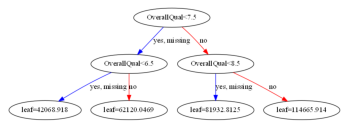

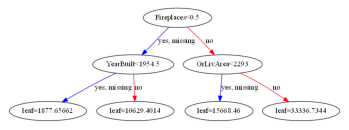

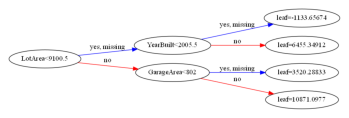

In [10]:
import matplotlib.pyplot as plt
# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data=X, label=y)
# set plt figure size
plt.rcParams['figure.figsize'] = [18, 16]
plt.rcParams['figure.dpi'] = 300

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":2}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round=10)

# Plot the first tree
xgb.plot_tree(xg_reg, num_trees = 0)
plt.show()

# Plot the fifth tree
xgb.plot_tree(xg_reg, num_trees = 4)
plt.show()

# Plot the last tree sideways
xgb.plot_tree(xg_reg, num_trees = 9, rankdir="LR")
plt.show()

Have a look at each of the plots. They provide insight into how the model arrived at its final decisions and what splits it made to arrive at those decisions. This allows us to identify which features are the most important in determining house price. In the next exercise, you'll learn another way of visualizing feature importances.

### Visualizing feature importances: What features are most important in my dataset  

Another way to visualize your XGBoost models is to examine the importance of each feature column in the original dataset within the model.

One simple way of doing this involves counting the number of times each feature is split on across all boosting rounds (trees) in the model, and then visualizing the result as a bar graph, with the features ordered according to how many times they appear. XGBoost has a ```plot_importance()``` function that allows you to do exactly this, and you'll get a chance to use it in this exercise!

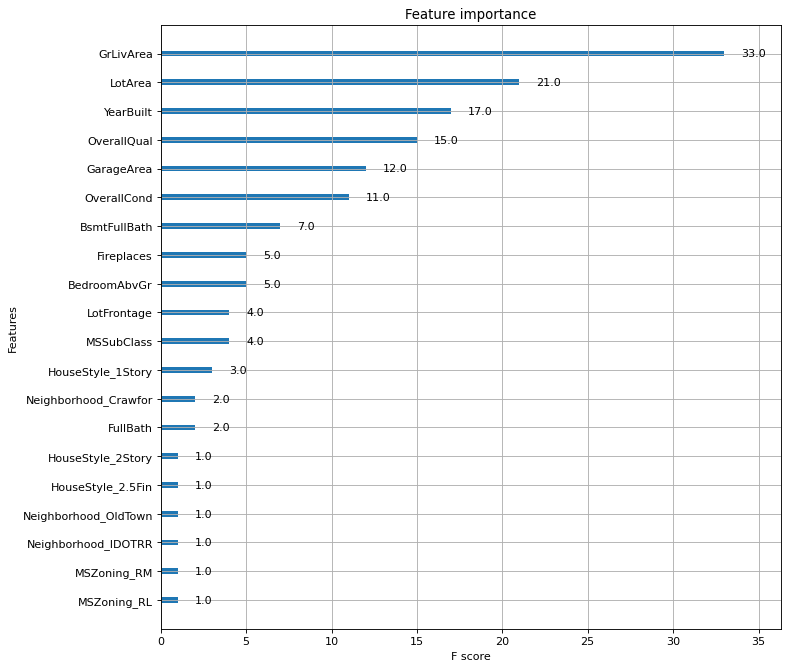

In [11]:
# set plt figure size and dpi
plt.rcParams['figure.figsize'] = [10, 10]
plt.rcParams['figure.dpi'] = 80

# Create the DMatrix: housing_dmatrix
housing_dmatrix = xgb.DMatrix(data = X, label= y)

# Create the parameter dictionary: params
params = {"objective":"reg:squarederror", "max_depth":4}

# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=housing_dmatrix, num_boost_round = 10)

# Plot the feature importances
xgb.plot_importance(xg_reg)
plt.show()